# Importing data 

In [5]:
import pandas
from sklearn import datasets

In [6]:
# Import Iris
iris = datasets.load_iris()

# Import play-tennis
pandas.read_csv('play-tennis.csv', header=0, index_col=False, true_values=["TRUE", "yes"], false_values=["FALSE", "no"])

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,False
1,sunny,hot,high,True,False
2,overcast,hot,high,False,True
3,rainy,mild,high,False,True
4,rainy,cool,normal,False,True
5,rainy,cool,normal,True,False
6,overcast,cool,normal,True,True
7,sunny,mild,high,False,False
8,sunny,cool,normal,False,True
9,rainy,mild,normal,False,True


# Iris Models Training 

In [75]:
def map_iris_output(x):
    '''
    Maps output class of iris dataset predicted by trained model into a name instead of integers
    '''
    if x == 0:
        return "Setosa"
    elif x == 1:
        return "Versicolour"
    else:
        return "Virginica"

## Naive Bayes 

In [52]:
from sklearn.naive_bayes import GaussianNB

In [173]:
# Extract the variables and targets
x = iris.data
y = list(map(map_iris_output, iris.target))

In [54]:
# Createclass that performs Gaussian Naive Bayes
iris_nb_model = GaussianNB()
iris_nb_model.fit(x, y)

GaussianNB(priors=None, var_smoothing=1e-09)

## DecisionTree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
iris_dt_model = DecisionTreeClassifier()
iris_dt_model.fit(x, y)

## KNN 

In [29]:
# Import KNN class
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Fit the model
iris_knn_model = KNeighborsClassifier(n_neighbors=5)
iris_knn_model.fit(x, y)

##  Neural Network MLP

In [32]:
# Import classifier class
from sklearn.neural_network import MLPClassifier

In [82]:
# Fit the model
iris_mlp_model = MLPClassifier(activation='logistic', solver='sgd', max_iter=10000, learning_rate_init=0.0005)
iris_mlp_model.fit(x, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

# Split-train Schema 

In [147]:
# Import function to split test-data
from sklearn.model_selection import train_test_split

# Import function to generate confusion matrix
from sklearn.metrics import confusion_matrix

# Prepare data for split-training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
y_train = list(map(map_iris_output, y_train))
y_test = list(map(map_iris_output, y_test))
print(len(x_train), len(x_test), len(y_train), len(y_test))

135 15 135 15


In [148]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



# Naive Bayes 

In [149]:
iris_nb_split_model = GaussianNB()
iris_nb_split_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [150]:
score = iris_nb_split_model.score(x_test, y_test)
print("Accuracy of Naive Bayes model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of Naive Bayes model on the Iris dataset with split-train schema is 93.3333333333%


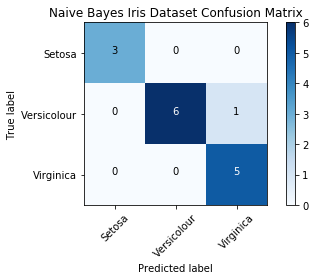

In [152]:
# Calculate prediction of test data
y_pred = iris_nb_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_nb_split_model.classes_, title="Naive Bayes Iris Dataset Confusion Matrix")
plt.show()

## Decision Tree

In [154]:
iris_dt_split_model = DecisionTreeClassifier()
iris_dt_split_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
score = iris_dt_split_model.score(x_test, y_test)
print("Accuracy of Decision Tree model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of Decision Tree model on the Iris dataset with split-train schema is 93.3333333333%


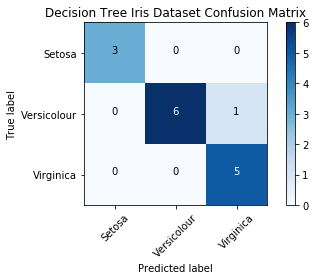

In [156]:
# Calculate prediction of test data
y_pred = iris_dt_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_dt_split_model.classes_, title="Decision Tree Iris Dataset Confusion Matrix")
plt.show()

## KNN

In [157]:
iris_knn_split_model = KNeighborsClassifier(n_neighbors=5)
iris_knn_split_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [158]:
score = iris_knn_split_model.score(x_test, y_test)
print("Accuracy of KNN model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of KNN model on the Iris dataset with split-train schema is 93.3333333333%


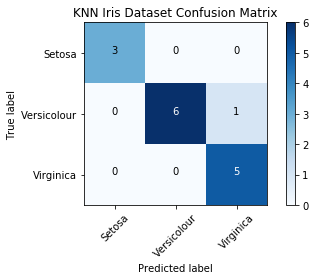

In [171]:
# Calculate prediction of test data
y_pred = iris_knn_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_knn_split_model.classes_, title="KNN Iris Dataset Confusion Matrix")
plt.show()

## Neural Network MLP 

In [168]:
iris_mlp_split_model = MLPClassifier(activation='logistic', max_iter=10000, learning_rate_init=0.0005)
iris_mlp_split_model.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [169]:
score = iris_mlp_split_model.score(x_test, y_test)
print("Accuracy of MLP model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of MLP model on the Iris dataset with split-train schema is 93.3333333333%


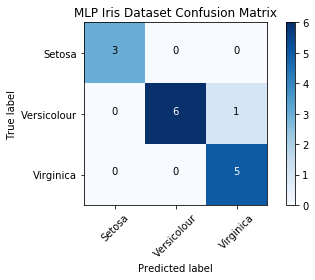

In [170]:
# Calculate prediction of test data
y_pred = iris_mlp_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_mlp_split_model.classes_, title="MLP Iris Dataset Confusion Matrix")
plt.show()

# Cross-Validation 

In [177]:
# Import function to perform k-fold cross validation
from sklearn.model_selection import cross_validate

## Naive Bayes

In [188]:
iris_nb_cv_model = GaussianNB()
scores = cross_validate(iris_nb_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of Naive Bayes Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of Naive Bayes Model on the Iris dataset using the 10-fold cross validation method is 95.33%


## Decision Tree

In [189]:
iris_dt_cv_model = GaussianNB()
scores = cross_validate(iris_dt_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of Decision Tree Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of Decision Tree Model on the Iris dataset using the 10-fold cross validation method is 95.33%


## KNN

In [190]:
iris_knn_cv_model = GaussianNB()
scores = cross_validate(iris_knn_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of KNN Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of KNN Model on the Iris dataset using the 10-fold cross validation method is 95.33%


## Neural Network MLP

In [191]:
iris_mlp_cv_model = GaussianNB()
scores = cross_validate(iris_mlp_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of MLP Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of MLP Model on the Iris dataset using the 10-fold cross validation method is 95.33%
